<a href="https://colab.research.google.com/github/khodozzz/graph-shortest-path/blob/main/shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.asarray([[0, 0, 0, 0, 1, 3],
                  [0, 0, 2, 0, 0, 4],
                  [0, 2, 0, 0, 0, 0],
                  [0, 7, 0, 0, 1, 0],
                  [0, 2, 0, 0, 0, 0],
                  [0, 2, 0, 0, 0, 0]])
N = arr.shape[0]

G = nx.DiGraph(directed=True)
for i in range(N):
    G.add_node(i)
for i in range(N):
    for j in range(N):
        if arr[i, j] > 0:
            G.add_edge(i, j, weight=arr[i, j])

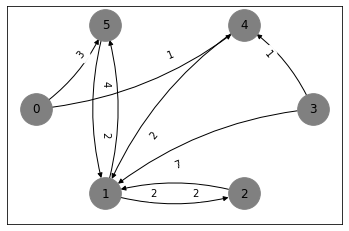

In [6]:
edge_labels=dict([((u, v), d['weight']) for u, v, d in G.edges(data=True)])
connectionstyle='arc3, rad = 0.15'

pos=nx.shell_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='grey', 
                 connectionstyle=connectionstyle)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.35)
plt.show()

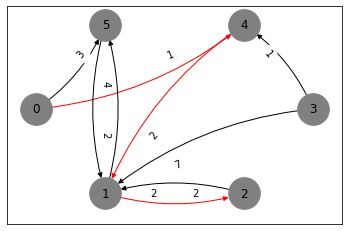

In [8]:
source = 0
target = 2

path = nx.shortest_path(G, source=source, target=target)

path_G = nx.DiGraph(directed=True)
for node in path:
    path_G.add_node(node)
for i in range(len(path)-1):
    path_G.add_edge(path[i], path[i+1])

edge_color=['black' if edge not in path_G.edges else 'red' for edge in G.edges]
edge_labels=dict([((u, v), d['weight']) for u, v, d in G.edges(data=True)])
connectionstyle='arc3, rad = 0.15'

pos=nx.shell_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='grey', 
                 connectionstyle=connectionstyle, edge_color=edge_color)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.35)
plt.show()